## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df.query('converted == 1').user_id.count() / df.user_id.count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df.landing_page.unique()

array(['old_page', 'new_page'], dtype=object)

In [8]:
df.group.unique()

array(['control', 'treatment'], dtype=object)

In [9]:
df.query('landing_page != "new_page" or group != "treatment"').user_id.count() - df.query('landing_page != "new_page" and group != "treatment"').user_id.count()

3893

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


>There is no missing value.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df.drop(df.query('landing_page == "new_page" and group != "treatment"').index)

In [12]:
df2.drop(df.query('landing_page != "new_page" and group == "treatment"').index, inplace=True)

In [13]:
df2.shape[0]

290585

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2.duplicated(subset=['user_id'])].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop_duplicates('user_id', inplace=True)

In [19]:
df2.user_id.count()

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df2.query('converted == 1').user_id.count() / df2.user_id.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2.query('converted == 1 and group =="control"').user_id.count() / df2.query('group == "control"').user_id.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df2.query('converted == 1 and group =="treatment"').user_id.count() / df2.query('group == "treatment"').user_id.count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [24]:
df2.query('landing_page == "new_page"').user_id.count() / df2.user_id.count()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
>There is no evidence to say that the new treatment page leads to more conversions, it even decreases. Meanwhile, the numbers of treatment and control group are similar, so there is no problem of sample size.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
> Null hypothesis: **$p_{old}$** >= **$p_{new}$**   
> Alternative hypothesis: **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [25]:
df2.query('converted == 1').user_id.count() / df2.user_id.count()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
df2.query('converted == 1').user_id.count() / df2.user_id.count()

0.11959708724499628

c. What is $n_{new}$?

In [27]:
n_new = df2.query('landing_page == "new_page"').user_id.count()
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice(2, n_new, p=[0.8804, 0.1196])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice(2, n_old, p=[0.8804, 0.1196])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff_observed = new_page_converted.mean() - old_page_converted.mean()
diff_observed

-0.0007454631562562458

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_sample = np.random.choice(2, n_new, p=[0.8804, 0.1196])
    old_sample = np.random.choice(2, n_old, p=[0.8804, 0.1196])
    p_diffs.append(new_sample.mean() - old_sample.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

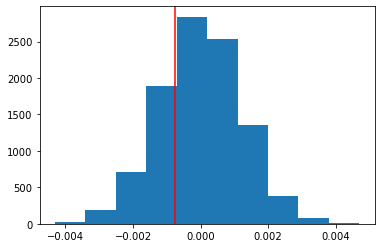

In [33]:
plt.hist(p_diffs)
plt.axvline(diff_observed, color='r');

In [34]:
(p_diffs > diff_observed).mean()

0.7295

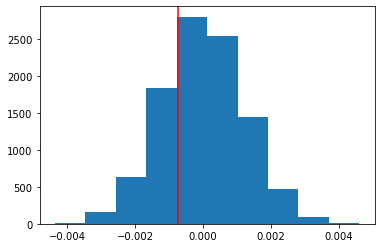

In [35]:
p_diffs = np.array(p_diffs)
null_value = np.random.normal(0, p_diffs.std(), 10000)
plt.hist(null_value)
plt.axvline(diff_observed, color='r');

>Sampling distribution looks like our expectation.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
actual_diff = df2.query('converted == 1 and landing_page == "new_page"').user_id.count() / df2.query('landing_page == "new_page"').user_id.count() - df2.query('converted == 1 and landing_page == "old_page"').user_id.count() / df2.query('landing_page == "old_page"').user_id.count()

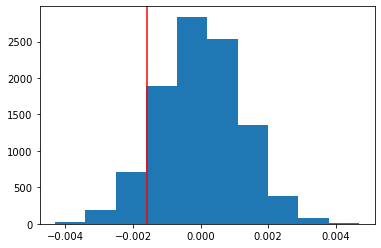

In [37]:
plt.hist(p_diffs)
plt.axvline(actual_diff, color='r');

In [38]:
(p_diffs > actual_diff).mean()

0.9032

In [39]:
(p_diffs < actual_diff).mean()

0.0968

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**  
> Since the left-tailed test, the p-value I think is the proportion of the **p_diffs** are lesser than than actual difference observed in **ab_data.csv**. Am I right?  
The p-value I computed from sampling distribution is 0.0968, which is greater than 0.05, so it is no statistical significance. The result is failing to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1 and landing_page == "old_page"').user_id.count()
convert_new = df2.query('converted == 1 and landing_page == "new_page"').user_id.count()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [41]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]))
print('{0:0.3f}'.format(stat))
print('{0:0.3f}'.format(pval))

-1.311
0.190


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
>The Z-value is -1.311 greater than -1.64485 (the Z critical value for a left-tailed test with a significance level of .05), so  the result of the test is no statistically significant. The p-value show the same result.  
The result in parts **j.** and **k.** is as same as part **I.** despite different p-value. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
>The value we want is categorical data, so I choose to use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [43]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        07:58:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**   
>According to logitic regression, The p-value indicates that the relationship of ab_page and conversion is not statistically significant.   

>The p-value is same as the one of z-test because they both are for coefficient of pages and conversion.   
However, it differ from the p-value in part **j.** because the one in part **j.** is achieved from sampling distribution we manually made.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
>The user's information such as gender, age, whether view the old page before, etc. might also influence the conversion rate. For example, if target audience of the e-commerce website is middle-aged women, so that the data of the other group might be not important. Oppositely, the target audience should be clearly defined (maybe an another statistic analysis), otherwise, it may lead to wrong direction, also be careful of change aversion and novelty effect. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [47]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [48]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [49]:
df_new['UK'] = pd.get_dummies(df_new['country'])['UK']
df_new['CA'] = pd.get_dummies(df_new['country'])['CA']

In [50]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:               2.323e-05
Time:                        07:58:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

>According to the p-value, there are no statistical significance between conversion and each variable.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
df_new['US'] = pd.get_dummies(df_new['country'])['US']

In [52]:
new_UK = []
old_UK = []
for x,y in zip(df_new['ab_page'], df_new['UK']):
    if x == 1 and y == 1:
        new_UK.append(1)
        old_UK.append(0)
    elif x == 0 and y == 1:
        old_UK.append(1)
        new_UK.append(0)
    else:
        new_UK.append(0)
        old_UK.append(0)
df_new['new_UK'] = np.array(new_UK)
df_new['old_UK'] = np.array(old_UK)

In [53]:
new_CA = []
old_CA = []
new_US = []
old_US = []
for x,y in zip(df_new['ab_page'], df_new['CA']):
    if x == 1 and y == 1:
        new_CA.append(1)
        old_CA.append(0)
    elif x == 0 and y == 1:
        old_CA.append(1)
        new_CA.append(0)
    else:
        new_CA.append(0)
        old_CA.append(0)
for x,y in zip(df_new['ab_page'], df_new['US']):
    if x == 1 and y == 1:
        new_US.append(1)
        old_US.append(0)
    elif x == 0 and y == 1:
        old_US.append(1)
        new_US.append(0)
    else:
        new_US.append(0)
        old_US.append(0)        
    
df_new['new_CA'] = np.array(new_CA)
df_new['old_CA'] = np.array(old_CA)
df_new['new_US'] = np.array(new_US)
df_new['old_US'] = np.array(old_US)

In [54]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'new_UK', 'old_UK', 'new_CA', 'old_CA', 'new_US']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:               3.482e-05
Time:                        07:58:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
new_UK         0.0051      0.019      0.271      0.786      -0.032       0.042
old_UK        -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_CA        -0.0850      0.038     -2.216      0.027      -0.160      -0.010
old_CA        -0.0175      0.038     -0.465      0.642      -0.091       0.056
new_US        -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

In [57]:
df_new["ab_UK"] = df_new["ab_page"] * df_new["UK"]
df_new["ab_CA"] = df_new["ab_page"] * df_new["CA"]

In [59]:
lm = sm.Logit(df_new["converted"], df_new[["intercept", "ab_page", "ab_UK", "ab_CA"]])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 25 Jul 2021   Pseudo R-squ.:               3.351e-05
Time:                        09:38:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0183      0.013     -1.449      0.147      -0.043       0.006
ab_UK          0.0257      0.019      1.363      0.173      -0.011       0.063
ab_CA         -0.0644      0.038     -1.679      0.093      -0.140       0.011
==============================================================================
"""

In [56]:
1 / np.exp(-0.085)

1.0887170666983987

>According to the p-value, the interaction of new_page and CA is statistically significant with conversion. It shows that if an individual is american and view old page, they are 1.089 times more likely to convert than if they are Canadian and view new page, holding all other variables constant.   
However, there are no statistical significance between between other variables.

<a id='conclusions'></a>
## Conclusions

In conclusion, all statistic lead to same result which is accept the null hypothesis. The old page is not greater than new one.
In spite of the same result, we can observe that when we add more detailed columns like country, we can gain more information about the relationship between dependent variable and independent variable. Moreover, the logistic regression also easily give more details than sampling distribution and z-test.

## Resources  
https://support.minitab.com/en-us/minitab/19/help-and-how-to/statistics/basic-statistics/how-to/1-sample-z/interpret-the-results/all-statistics-and-graphs/  
https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html  
https://www.statology.org/z-critical-value-python/#:~:text=If%20the%20absolute%20value%20of%20the%20test%20statistic,scipy.stats.norm.ppf%20%28%29%20function%2C%20which%20uses%20the%20following%20syntax%3A